In [1]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as pdates
import warnings
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv(".//data/China_Al.csv",thousands=',')

df=data.dropna()
df.tail()

,Year,CO2,AL2O3,AL,Electricity_for_Al2O3,Electricity_for_Al,Electricity_total
6,2016,1947.12,1596.0,295.0,19.15,39.82,58.97
7,2015,2228.80,1592.0,352.0,19.10,47.50,66.60
8,2014,1370.28,1202.0,320.0,14.42,43.20,57.62
9,2013,1626.76,1214.0,351.0,14.56,47.38,61.94
10,2012,1540.26,1194.0,394.0,14.32,53.19,67.51


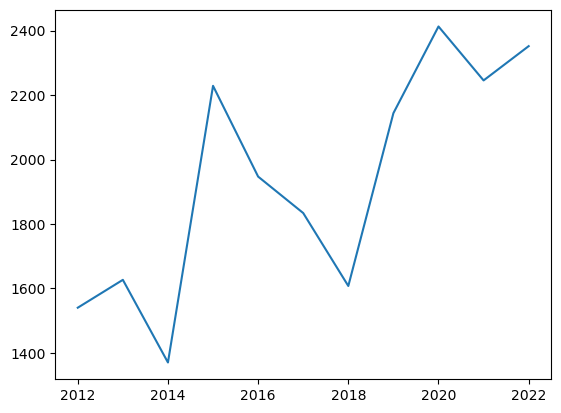

In [34]:
df.index=pd.to_datetime(df.Year,format="%Y")
plt.plot(df.Year,df.CO2)

In [12]:
def Find_opt_trend(train_set):
    trend_option=['n','c','t','ct']
    for trend in trend_option:
        res_sol=ardl_select_order(train_set.CO2,0,train_set[['Electricity_total','AL2O3','AL']],1,ic='aic',trend=trend)
        res=res_sol.model.fit()
        if 'AIC' not in vars():
            AIC=res.aic
            opt_trend=trend
        else:
            if res.aic<AIC:
                opt_trend=trend
    return opt_trend      

In [51]:
res_sol=ardl_select_order(df.CO2,1,df[['Electricity_total','AL2O3','AL']],1,ic='aic',trend='t')
print(res_sol.model.ardl_order)
res=res_sol.model.fit()
res.summary()

(0, 1, 1, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                   11
Model:               ARDL(0, 1, 1, 1)   Log Likelihood                 -67.801
Method:               Conditional MLE   S.D. of innovations            114.987
Date:                Tue, 06 Jun 2023   AIC                            151.603
Time:                        13:53:30   BIC                            154.786
Sample:                             1   HQIC                           149.596
                                   11                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
trend                  -26.5118     30.195     -0.878      0.430    -110.346      57.322
Electricity_total.L0 -1635.5074   2527.097     -0.647      0.553   -8651.852    5380.837
Electricity_total.L1 -2203.2776   1639.470     -1.344      0.250   -6755.175    2348.620
AL2O3.L0                21.2271     30.372      0.699      0.523     -63.099     105.553
AL2O3.L1                26.2798     19.285      1.363      0.245     -27.264      79.824
AL.L0                  222.5831    342.223      0.650      0.551    -727.579    1172.745
AL.L1                  295.6108    221.610      1.334      0.253    -319.679     910.900
========================================================================================
"""

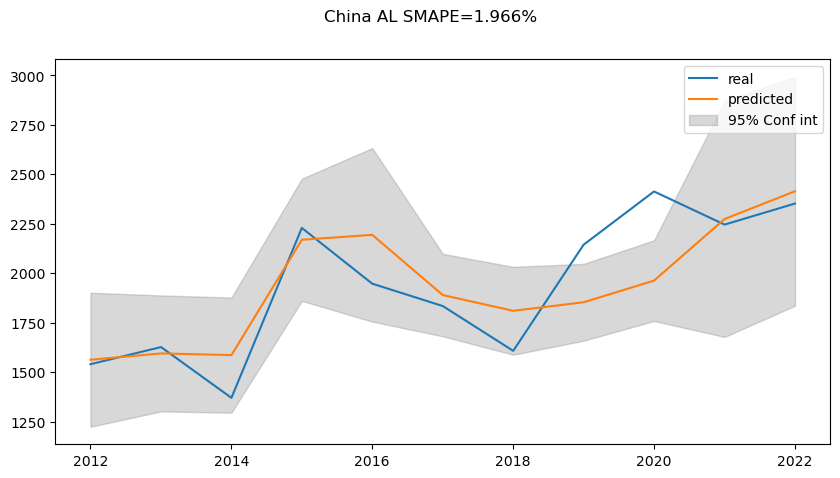

In [41]:
model = sm.OLS(df.CO2, sm.add_constant(df[['Electricity_total','AL2O3','AL']])).fit()
r_squared = model.rsquared
predict=model.get_prediction(sm.add_constant(df[['Electricity_total','AL2O3','AL']]))
predict_value=pd.Series(predict.predicted_mean,index=df.index)
predict_conf_int=predict.conf_int()
err=np.mean(np.abs((predict_value-df.CO2)/(predict_value+df.CO2)/2))*100
fig,ax=plt.subplots(figsize=(10,5))
fig.suptitle("China AL"+" SMAPE="+format(err,'.3f')+"%")
ax.plot(df.index,df.CO2,label='real')
ax.plot(df.index,predict_value.values,label='predicted')
ax.fill_between(df.index,predict_conf_int[:,0],predict_conf_int[:,1],alpha=0.3,color='grey',label="95% Conf int")
ax.legend(loc='best')
# filename=".\\figure\\" +province+"_R^2="+format(r_squared,'.3f')+".png"
# plt.savefig(filename,dpi=150)
plt.show()

In [47]:
err=np.mean(np.abs((predict_value-df.CO2)/(df.CO2)/1))*100
print('相对误差%.3f'% err,'%')

相对误差7.845 %


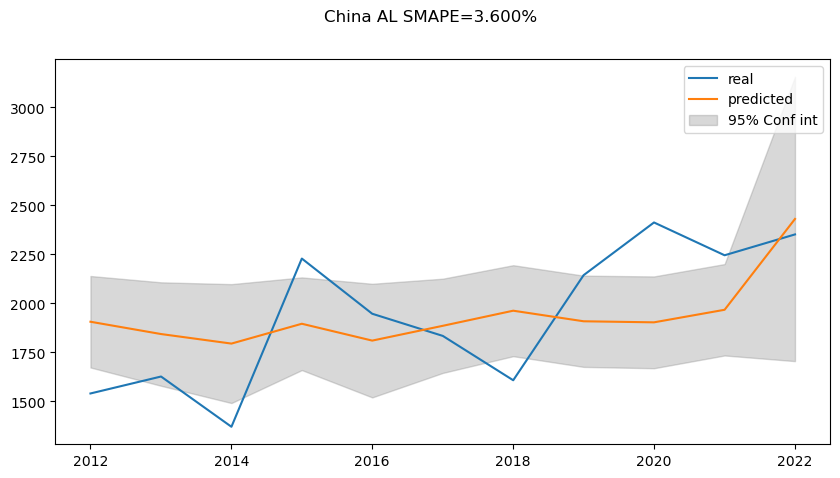

In [52]:
model = sm.OLS(df.CO2, sm.add_constant(df[['Electricity_total']])).fit()
r_squared = model.rsquared
predict=model.get_prediction(sm.add_constant(df[['Electricity_total']]))
predict_value=pd.Series(predict.predicted_mean,index=df.index)
predict_conf_int=predict.conf_int()
err=np.mean(np.abs((predict_value-df.CO2)/(predict_value+df.CO2)/2))*100
fig,ax=plt.subplots(figsize=(10,5))
fig.suptitle("China AL"+" SMAPE="+format(err,'.3f')+"%")
ax.plot(df.index,df.CO2,label='real')
ax.plot(df.index,predict_value.values,label='predicted')
ax.fill_between(df.index,predict_conf_int[:,0],predict_conf_int[:,1],alpha=0.3,color='grey',label="95% Conf int")
ax.legend(loc='best')
# filename=".\\figure\\" +province+"_R^2="+format(r_squared,'.3f')+".png"
# plt.savefig(filename,dpi=150)
plt.show()